# Bagging and random forests

In [1]:
import numpy as np
from scipy.stats import binom
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Model aggregation

### Question 1

Having $L$ classifiers with a probability of correct prediction $p$ is equivalent to repeating independantly $L$ times a prediction with a probability of success $p$, hence the binomial law.

The probability of correct prediction is:
$\mathbb{P}(X > \frac{L}{2}) = \sum_{i=\frac{L}{2}+1}^{L}\binom{L}{i}p^i(1-p)^{L-i}$

In our case, that means:
$\mathbb{P}(X > 5) = \sum_{i=6}^{10}\binom{10}{i}0.7^i0.3^{10-i}$

In [2]:
print((1-binom.cdf(5, 10, 0.7))*100, "%")

84.97316674 %


Even with rather inefficient classifiers ($p=0.7$), making $L=10$ of them vote is enough to get a much better result.

## Bagging

### Question 1

Let's observe how the efficiency of bagging versus a single decision tree varies with depth.

<Figure size 432x288 with 0 Axes>

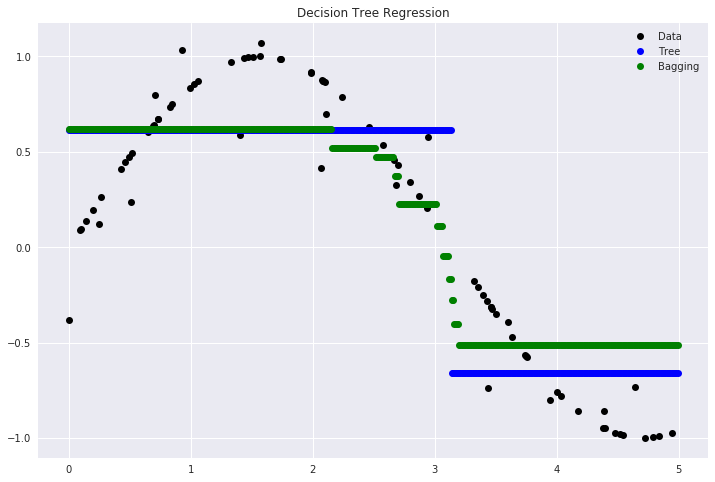

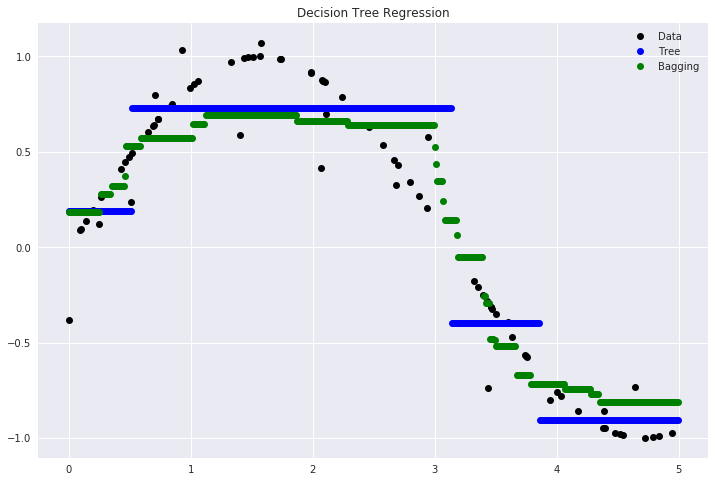

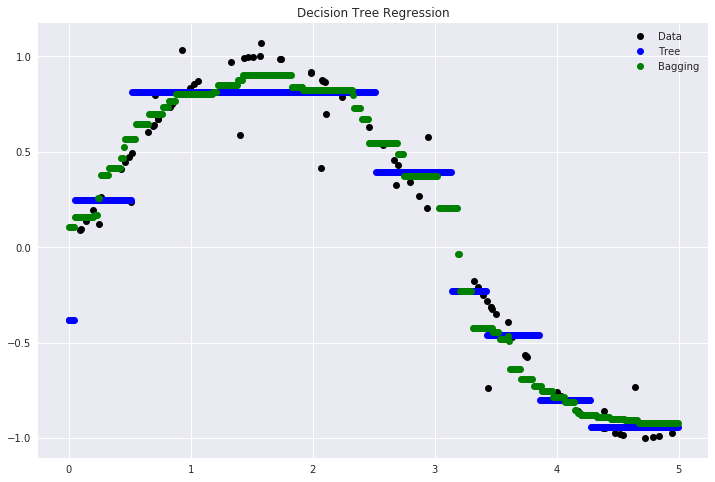

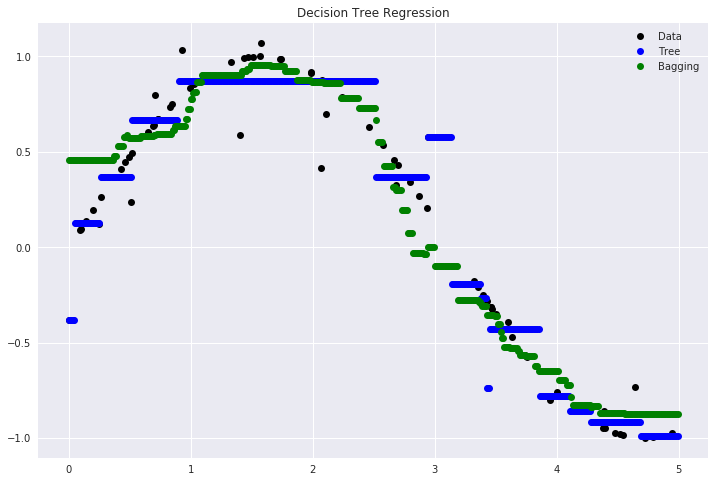

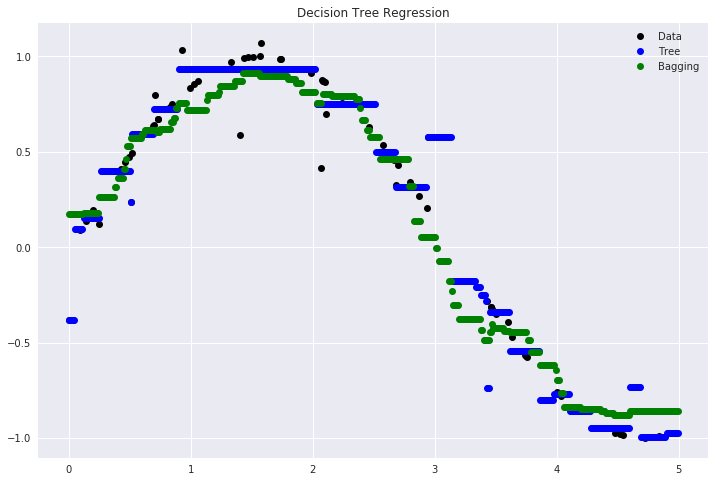

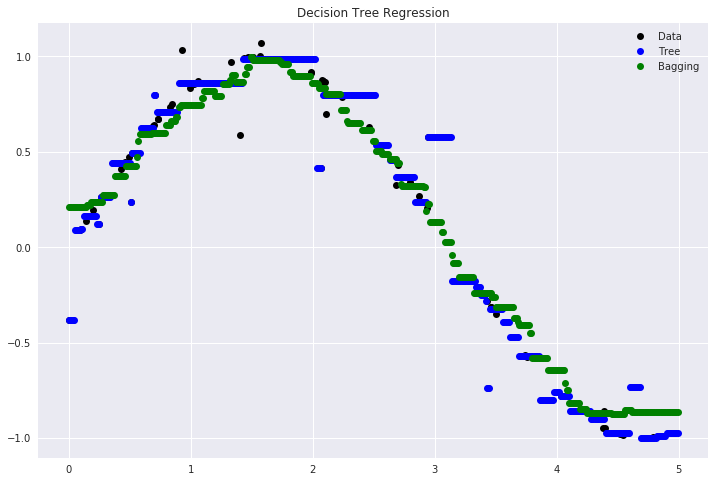

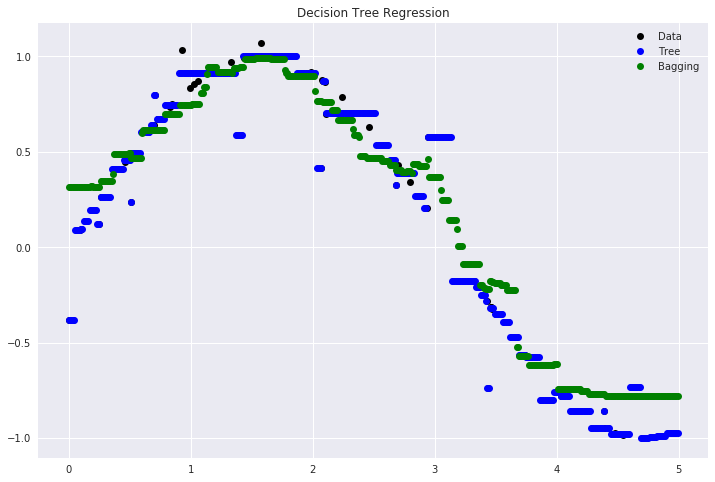

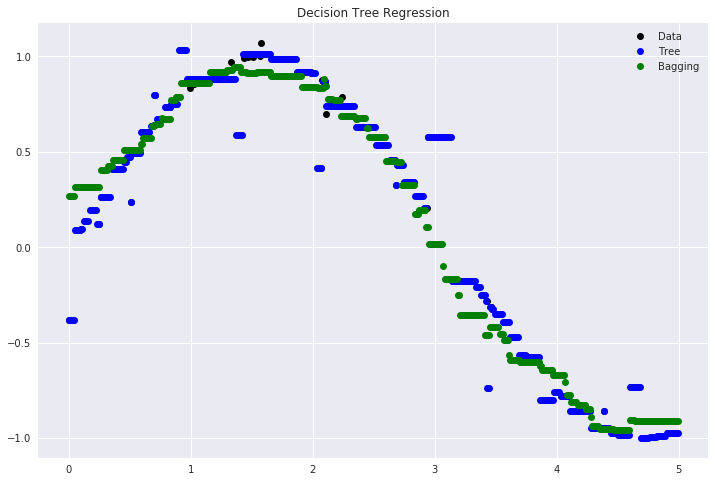

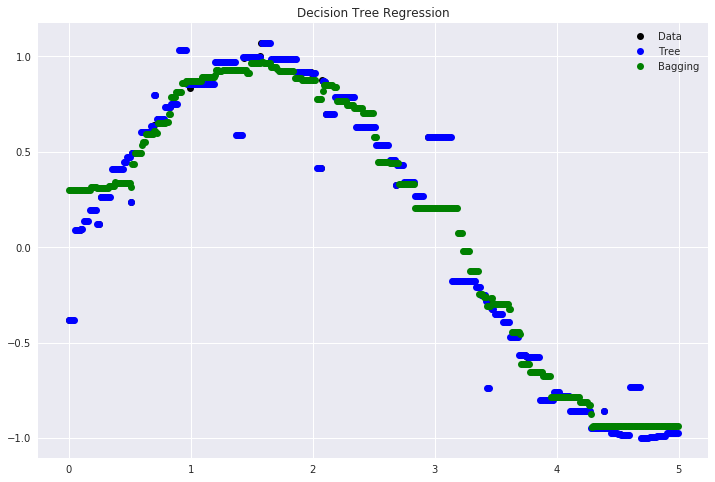

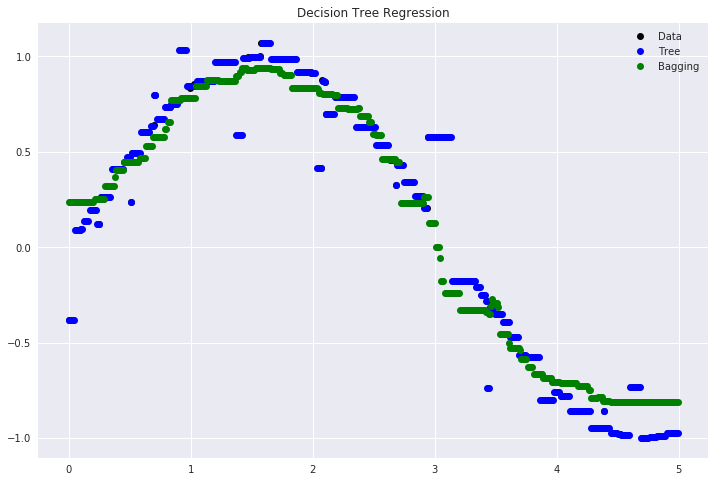

In [11]:
plt.clf()
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
n_estimators = 10 # L in the text
tree_max_depth = 10
bagging_max_depth = 10

for depth in range(tree_max_depth):
    tree = DecisionTreeRegressor(max_depth=depth+1)
    tree.fit(X, y)
    tr = DecisionTreeRegressor(max_depth=depth+1)
    bag = BaggingRegressor(tr, n_estimators, bagging_max_depth)
    bag.fit(X, y)

    # Predict
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_tree = tree.predict(X_test)
    y_bag = bag.predict(X_test)
    # Plot the results
    plt.figure(figsize=(12, 8))
    plt.plot(X, y, 'ko', label="Data")
    # TODO add plots for Bagging/Tree
    plt.plot(X_test, y_tree, 'bo', label="Tree")
    plt.plot(X_test, y_bag, 'go', label="Bagging")
    plt.title("Decision Tree Regression")
    plt.legend()
plt.show()